# Data Cleaning and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

# read dataset
df = pd.read_csv("labeled_data.csv")
df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [2]:
# dataset info
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset\n\n")

print(f"Columns in the dataset:")
for column in df.columns:
    print(column)
    
print("\n\n")

print("Brief information about the dataset:\n", 
      df.info())

There are 24783 rows and 7 columns in the dataset


Columns in the dataset:
Unnamed: 0
count
hate_speech
offensive_language
neither
class
tweet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
Brief information about the dataset:
 None


In [3]:
# checking for duplicates
print(f" there are {df.duplicated().sum()} duplicates in this dataset")

 there are 0 duplicates in this dataset


In [4]:
# numerical column statistical summary
df.describe()

Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000

In [5]:
# drop unnecessary columns
df.drop(['Unnamed: 0'],
        axis=1, inplace=True)

In [6]:
# find the unique values in the class column
df["class"].unique()

array([2, 1, 0], dtype=int64)

Profile report on dataset

In [7]:
# data profiling
from ydata_profiling import ProfileReport

df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\nuell\AppData\Local\Temp\ipykernel_18504\1393220482.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


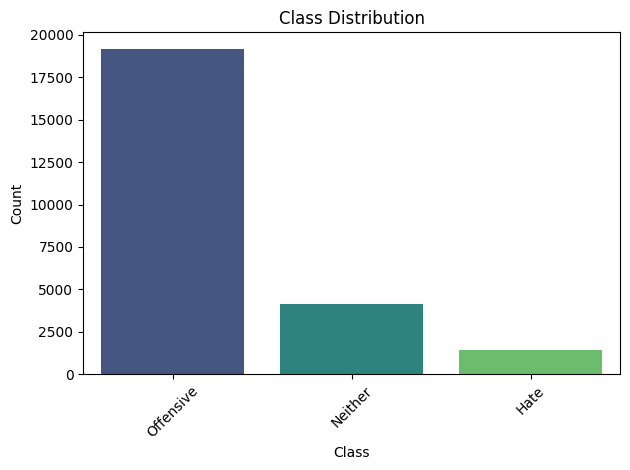

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
class_labels = {0: "Hate", 1: "Offensive", 2: "Neither"}

# Count class occurrences
class_counts = df['class'].value_counts()
class_counts.index = class_counts.index.map(class_labels)

# Plot
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Feature Engineering

In [16]:
# import necessary modules
import nltk
import re
import nltk
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# define a function to clean the tweet column
def clean_text(text):
    """
    Function to clean a tweet by removing URLs, mentions, hashtags, punctuation,
    converting text to lowercase, and removing stopwords.
    """
    if isinstance (text, str):# to check if the text is a string
        text = re.sub(r"http\S+|www\S+|http\S+", "", text, flags=re.MULTILINE) #remove urls
        text = re.sub(r"\@\w+|\#", "", text) # remove any hashtags or mentions that could be present 
        text = re.sub(r"[^\w\s]", "", text) # remove anu punctuations
        text = text.lower() # convert characters to lowercases
        text = " " .join([word for word in text.split() if word not in stop_words]) # to remove stopwords
    return text


# check if the function works
df['cleaned_tweet'] = df['tweet'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nuell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                       cleaned_tweet  
0  rt woman shouldnt complain cleaning house amp ...  
1  rt boy dats coldtyga dwn bad cuffin dat hoe 1s...  
2  rt dawg rt ever fuck bitch start cry confused ...  
3                                rt look like tranny  
4  rt shit hear might true might faker bitch told...

In [19]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Text Preprocessing Function
def preprocess_text(text):
    if isinstance (text, str):
        # Tokenization
        tokens = word_tokenize(text.lower())
    
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
        return ' '.join(tokens)
    return text

# Apply preprocessing to text column
# df['processed_text'] = df['tweet'].apply(preprocess_text)

df['cleaned_tweet'] = df['cleaned_tweet'].apply(preprocess_text)
df.head()





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nuell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nuell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                       cleaned_tweet  
0  rt woman shouldnt complain cleaning house amp ...  
1  rt boy dat coldtyga dwn bad cuffin dat hoe 1st...  
2  rt dawg rt ever fuck bitch start cry confused ...  
3                                rt look like tranny  
4  rt shit hear might true might faker bitch told...

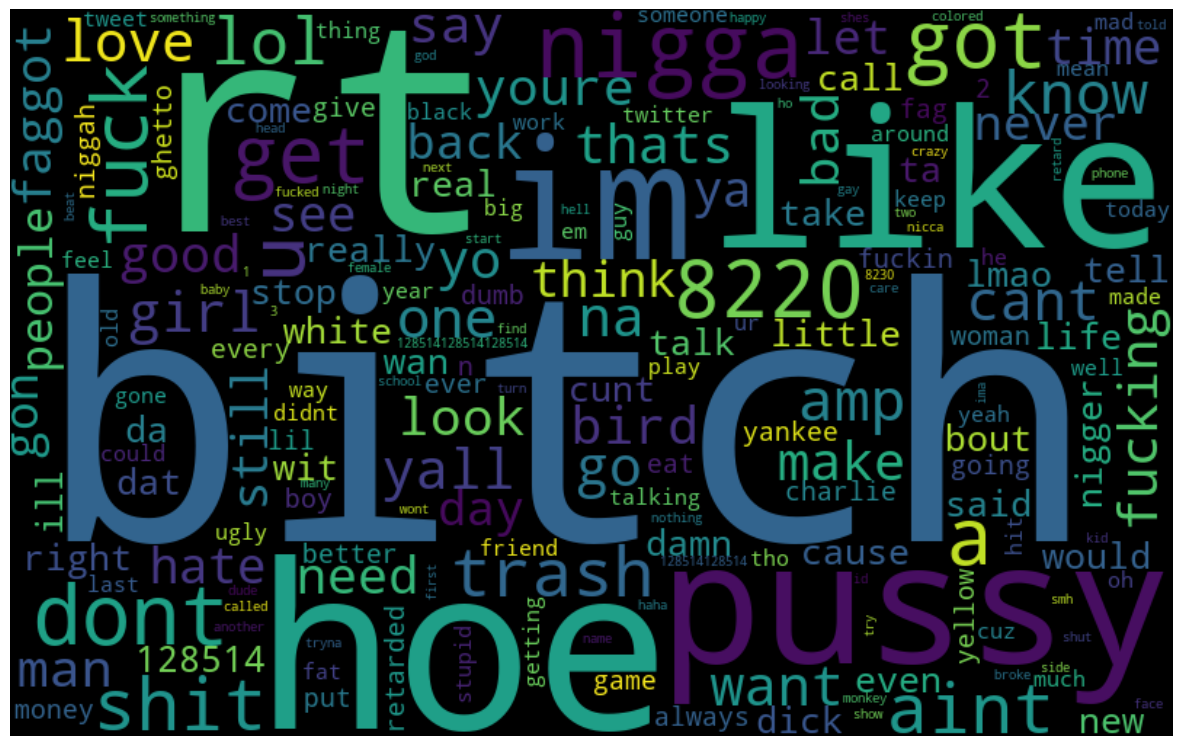

In [23]:
# visualise the most common words
words = []
for i in df.cleaned_tweet:
    words.extend(word_tokenize(i))
    a
wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(frequencies = Counter(words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

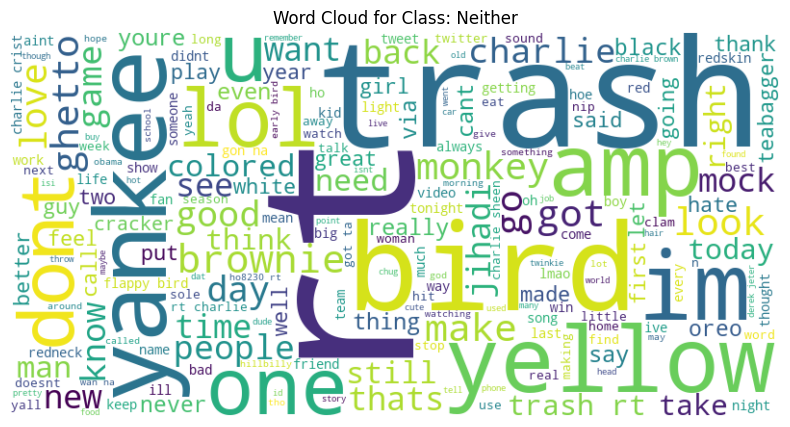

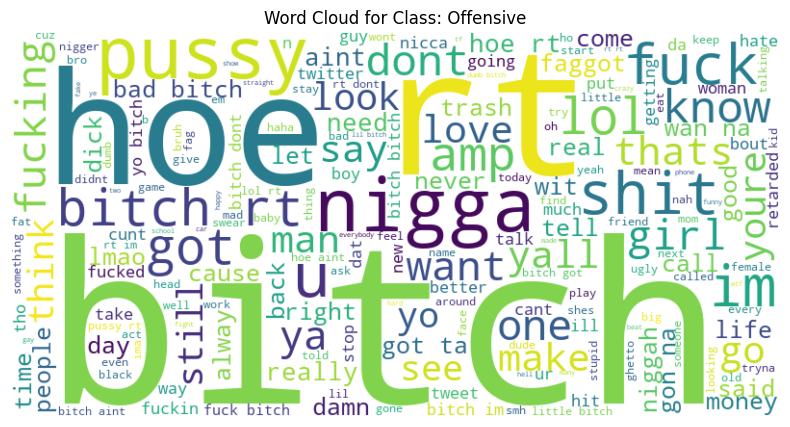

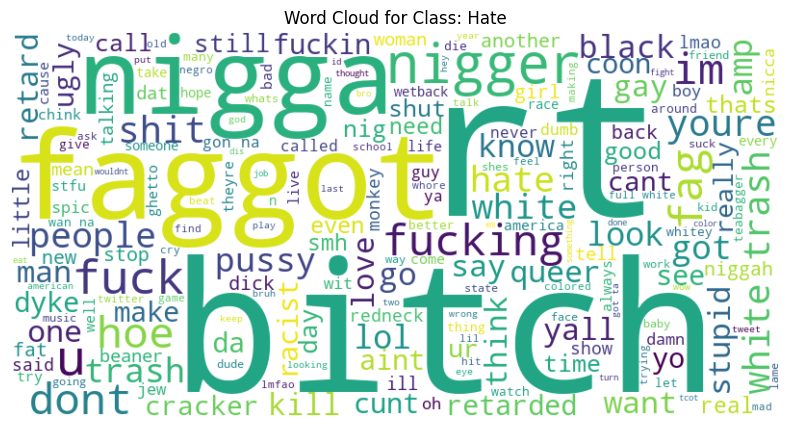

In [25]:
# specifying for each class
for class_label in df['class'].unique():
    text = " ".join(df[df['class'] == class_label]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for Class: {class_labels[class_label]}")
    plt.axis("off")
    plt.show()

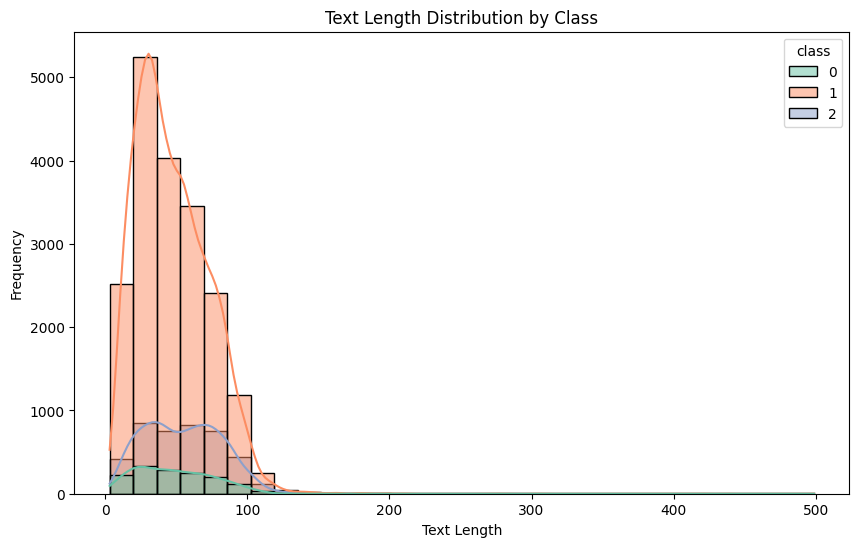

In [29]:
# finding out the distribution of text length
df['text_length'] = df['cleaned_tweet'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='class', kde=True, palette="Set2", bins=30)
plt.title("Text Length Distribution by Class")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


C:\Users\nuell\AppData\Local\Temp\ipykernel_18504\2868681348.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


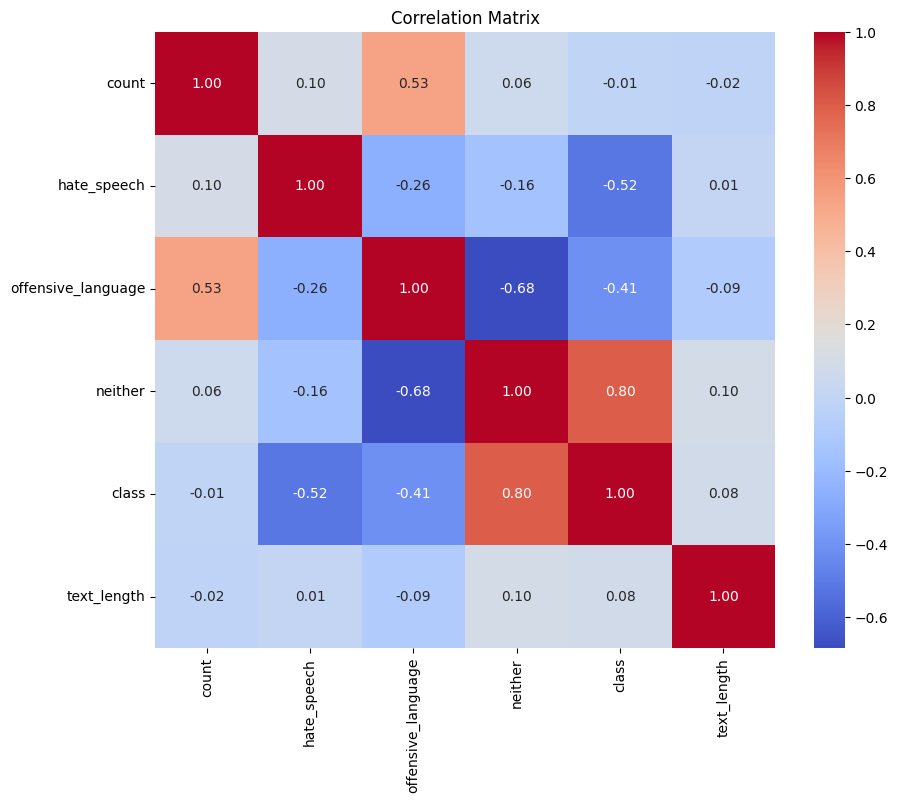

In [32]:
# finding out the relationships the numerical features have

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\nuell\AppData\Local\Temp\ipykernel_18504\571639611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="plasma")


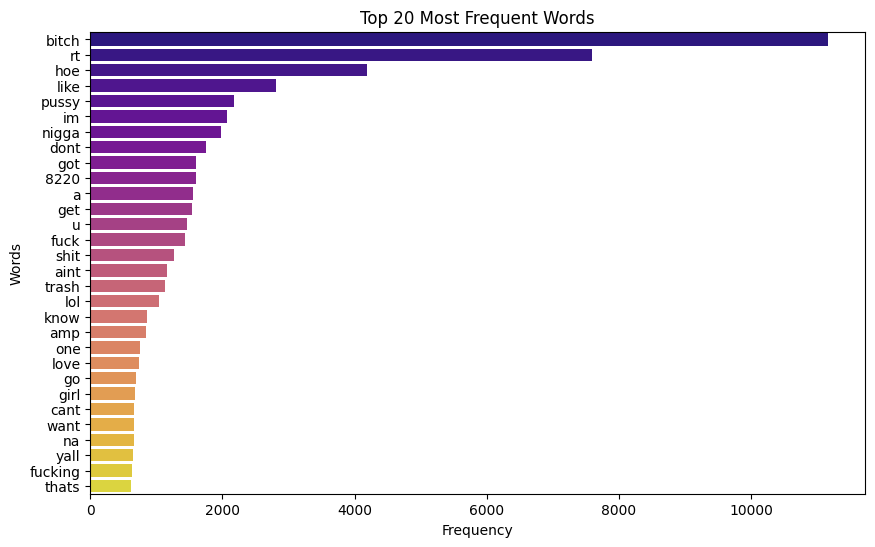

In [31]:
# finding the most frequently used words in the dataset

all_words = " ".join(df['cleaned_tweet']).split()
word_counts = Counter(all_words).most_common(30)

words, counts = zip(*word_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette="plasma")
plt.title("Top 30 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [33]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_df=0.8, max_features=100, stop_words='english')
X_vect = vectorizer.fit_transform(df['cleaned_tweet'])

C:\Users\nuell\AppData\Local\Temp\ipykernel_18504\68340682.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette="coolwarm")


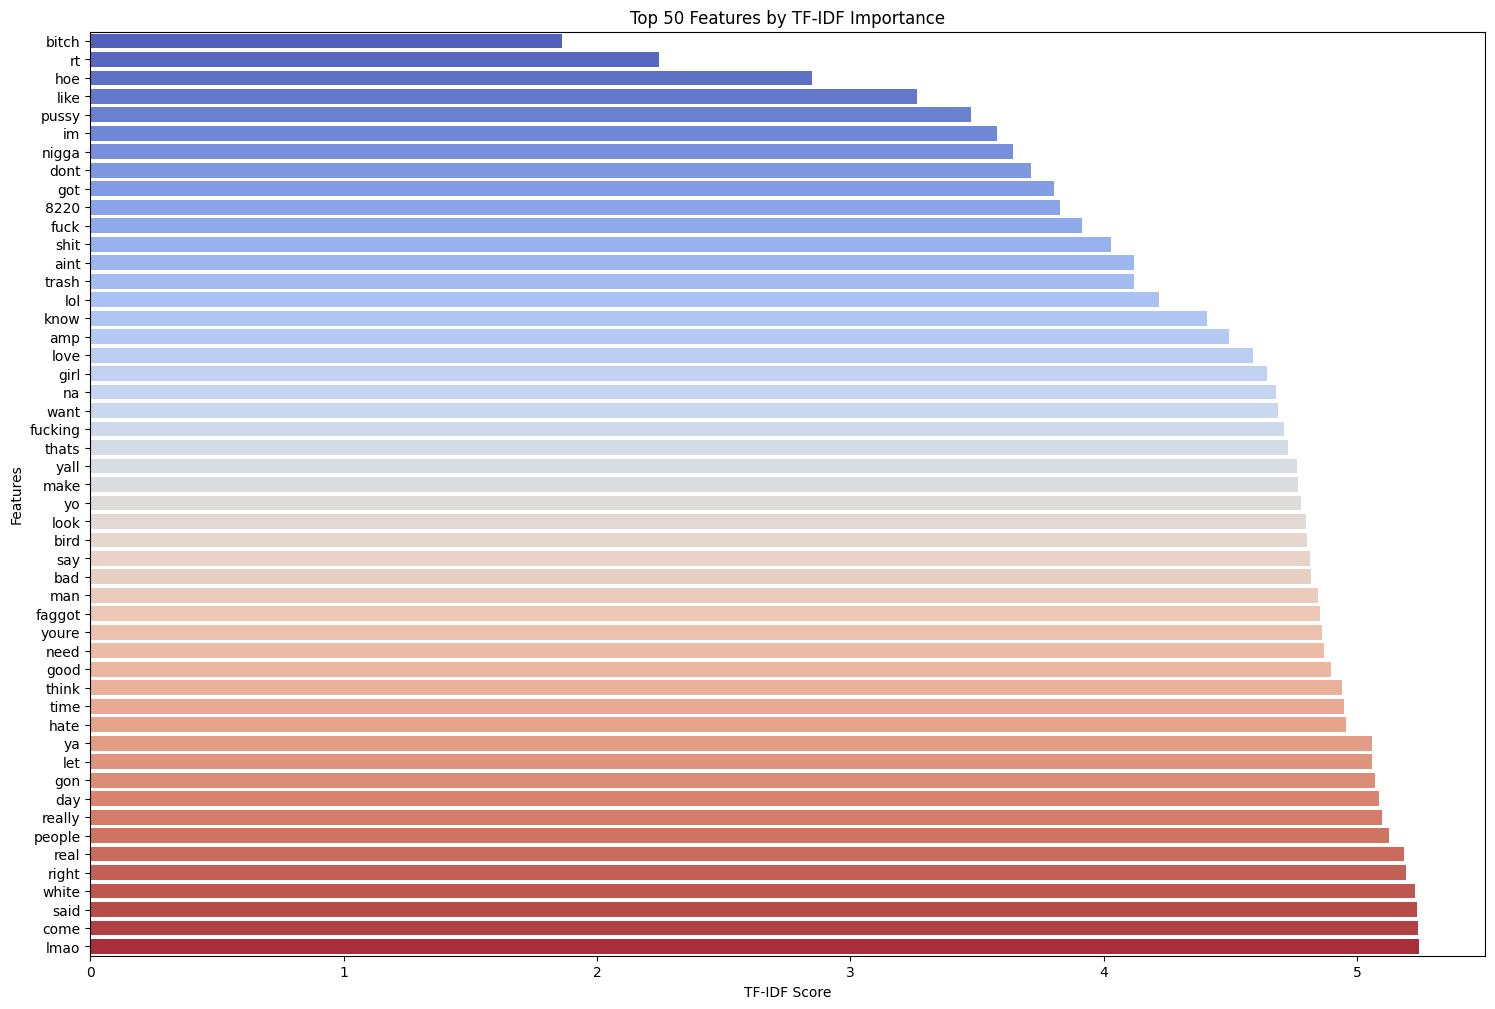

In [37]:
# visualising all important terms based on their TF-IDF scores
feature_array = vectorizer.get_feature_names_out()
tfidf_scores = vectorizer.idf_
sorted_indices = tfidf_scores.argsort()

top_n = 50
top_features = feature_array[sorted_indices[:top_n]]
top_scores = tfidf_scores[sorted_indices[:top_n]]

plt.figure(figsize=(18, 12))
sns.barplot(x=top_scores, y=top_features, palette="coolwarm")
plt.title("Top 50 Features by TF-IDF Importance")
plt.xlabel("TF-IDF Score")
plt.ylabel("Features")
plt.show()


In [38]:
# apply dimensionality reduction
pca = PCA(n_components=15) 
X_dense = X_vect.toarray()
reduced_features = pca.fit_transform(X_dense)

In [43]:
# Handle outliers using IQR method
def remove_outliers(X):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    outlier_mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
    return X[outlier_mask], outlier_mask

# Remove outliers
X_clean, outlier_mask = remove_outliers(reduced_features)
y_clean = df['class'][outlier_mask]

# The Model

In [50]:
# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Scale data for Logistic Regression, train and predict
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with multi-class support
lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)


lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


Logistic Regression Metrics:
Accuracy: 0.7145110410094637
Precision: 0.7213959500797137
Recall: 0.7145110410094637
F1 Score: 0.7026337690738729

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.89      0.74      0.80       821
           2       0.52      0.83      0.64       362

    accuracy                           0.71      1268
   macro avg       0.47      0.52      0.48      1268
weighted avg       0.72      0.71      0.70      1268



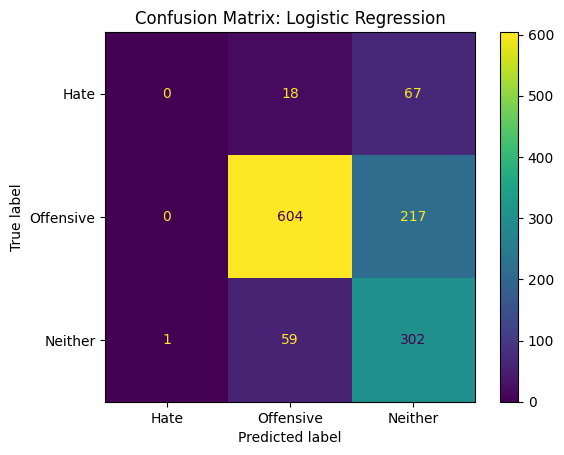

In [51]:
# metrics
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

# get a classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# plotting a confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(conf_matrix_lr, display_labels=["Hate", "Offensive", "Neither"])
disp_lr.plot(cmap="viridis")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

In [47]:
# trying with random forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Random Forest Metrics:
Accuracy: 0.7744479495268138
Precision: 0.7638973341527745
Recall: 0.7744479495268138
F1 Score: 0.7607289769043143

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.24      0.06      0.09        85
           1       0.87      0.81      0.84       821
           2       0.64      0.85      0.73       362

    accuracy                           0.77      1268
   macro avg       0.58      0.57      0.56      1268
weighted avg       0.76      0.77      0.76      1268



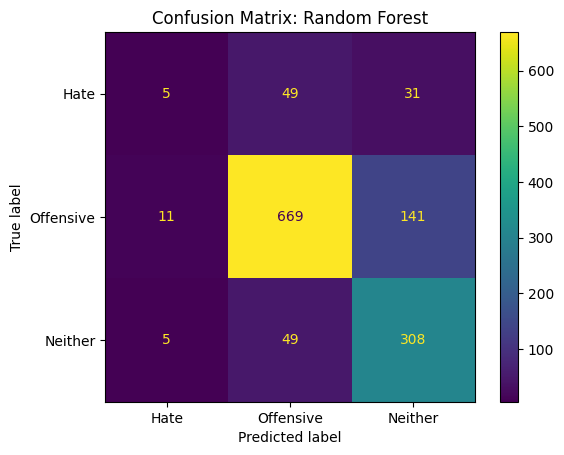

In [48]:
#  Metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# plotting a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Hate", "Offensive", "Neither"])
disp_rf.plot(cmap="viridis")
plt.title("Confusion Matrix: Random Forest")
plt.show()

# Hyperparameter Tuning

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Random Forest Metrics (After Hyperparameter Tuning):
Accuracy: 0.7783911671924291
Precision: 0.772947395026552
Recall: 0.7783911671924291
F1 Score: 0.7636571937146821

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.31      0.06      0.10        85
           1       0.88      0.81      0.84       821
           2       0.64      0.88      0.74       362

    accuracy                           0.78      1268
   macro avg       0.61      0.58      0.56      1268
weighted avg       0.77      0.78      0.76      1268



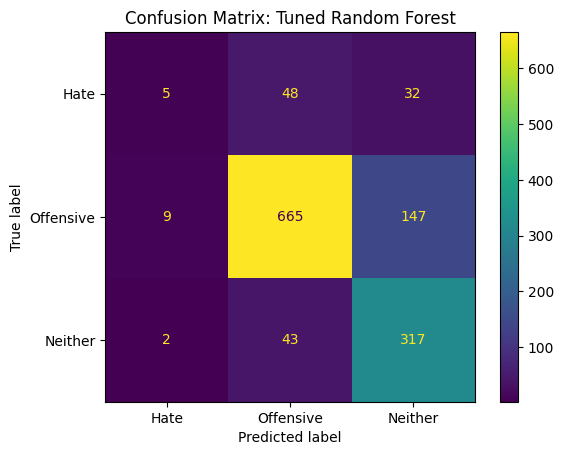

In [61]:
from sklearn.model_selection import GridSearchCV


# Hyperparameter tuning 
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid.best_params_)

# Evaluate the best model
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Metrics for the tuned model
print("\nRandom Forest Metrics (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Tuned Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Hate", "Offensive", "Neither"])
disp_rf.plot(cmap="viridis")
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()


Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Metrics (After Hyperparameter Tuning):
Accuracy: 0.7783911671924291
Precision: 0.7753241059042866
Recall: 0.7783911671924291
F1 Score: 0.7629304379502031

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.38      0.06      0.10        85
           1       0.88      0.81      0.84       821
           2       0.64      0.87      0.74       362

    accuracy                           0.78      1268
   macro avg       0.63      0.58      0.56      1268
weighted avg       0.78      0.78      0.76      1268



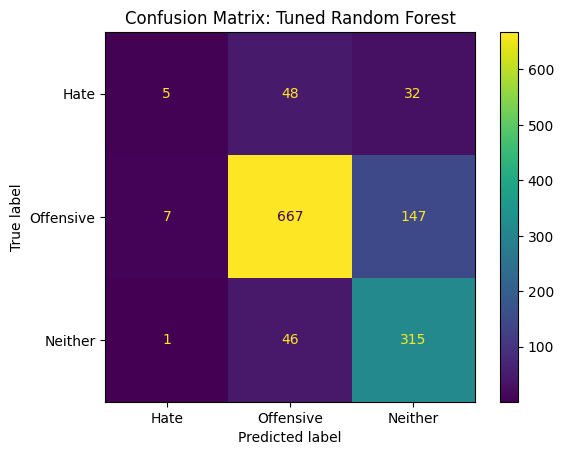

In [68]:
# Hyperparameter retuning 
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=4, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid.best_params_)

# Evaluate the best model
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Metrics for the tuned model
print("\nRandom Forest Metrics (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Tuned Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Hate", "Offensive", "Neither"])
disp_rf.plot(cmap="viridis")
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Metrics (After Hyperparameter Tuning):
Accuracy: 0.777602523659306
Precision: 0.747476129497716
Recall: 0.777602523659306
F1 Score: 0.7567968583059211

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      0.82      0.84       821
           2       0.64      0.87      0.74       362

    accuracy                           0.78      1268
   macro avg       0.50      0.56      0.53      1268
weighted avg       0.75      0.78      0.76      1268



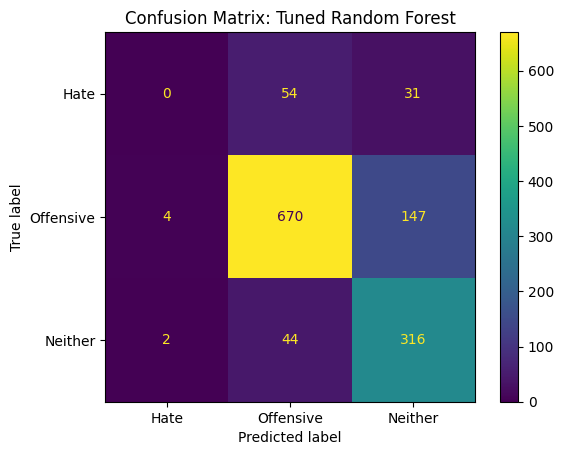

In [64]:
# Hyperparameter retuning 
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400], 
    'max_depth': [None, 10, 20, 10],  
    'min_samples_split': [4, 4, 10],  
    'min_samples_leaf': [1, 3, 5],  
    'max_features': ['sqrt', 'log2']  
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid.best_params_)

# Evaluate the best model
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Metrics for the tuned model
print("\nRandom Forest Metrics (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Tuned Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Hate", "Offensive", "Neither"])
disp_rf.plot(cmap="viridis")
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Metrics (After Hyperparameter Tuning):
Accuracy: 0.777602523659306
Precision: 0.747476129497716
Recall: 0.777602523659306
F1 Score: 0.7567968583059211

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      0.82      0.84       821
           2       0.64      0.87      0.74       362

    accuracy                           0.78      1268
   macro avg       0.50      0.56      0.53      1268
weighted avg       0.75      0.78      0.76      1268



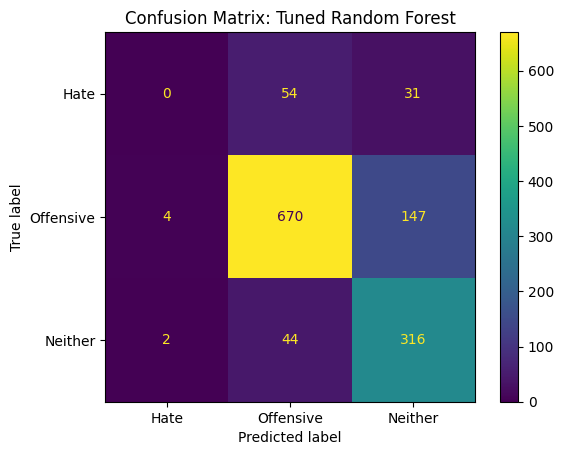

In [65]:
# Hyperparameter retuning 
rf_param_grid = {
    'n_estimators': [100, 200, 300, 300], 
    'max_depth': [None, 10, 20, 5],  
    'min_samples_split': [4, 4, 10],  
    'min_samples_leaf': [1, 3, 5],  
    'max_features': ['sqrt', 'log2']  
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid.best_params_)

# Evaluate the best model
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Metrics for the tuned model
print("\nRandom Forest Metrics (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Tuned Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Hate", "Offensive", "Neither"])
disp_rf.plot(cmap="viridis")
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Metrics (After Hyperparameter Tuning):
Accuracy: 0.777602523659306
Precision: 0.747476129497716
Recall: 0.777602523659306
F1 Score: 0.7567968583059211

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      0.82      0.84       821
           2       0.64      0.87      0.74       362

    accuracy                           0.78      1268
   macro avg       0.50      0.56      0.53      1268
weighted avg       0.75      0.78      0.76      1268



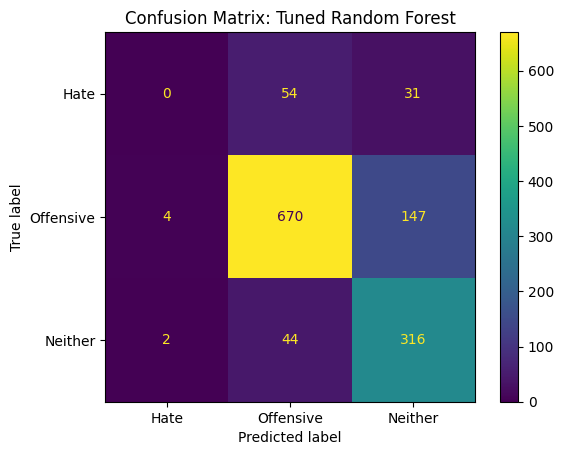

In [66]:
# Hyperparameter retuning 
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400], 
    'max_depth': [None, 10, 20, 10],  
    'min_samples_split': [4, 4, 10],  
    'min_samples_leaf': [1, 3, 10],  
    'max_features': ['sqrt', 'log2']  
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid.best_params_)

# Evaluate the best model
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Metrics for the tuned model
print("\nRandom Forest Metrics (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Tuned Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Hate", "Offensive", "Neither"])
disp_rf.plot(cmap="viridis")
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()


# Trying Other Models

In [54]:
!pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


XGBoost Metrics:
Accuracy: 0.7689274447949527

Classification Report:
              precision    recall  f1-score   support

        Hate       0.06      0.01      0.02        85
   Offensive       0.87      0.81      0.84       821
     Neither       0.64      0.85      0.73       362

    accuracy                           0.77      1268
   macro avg       0.52      0.56      0.53      1268
weighted avg       0.75      0.77      0.75      1268



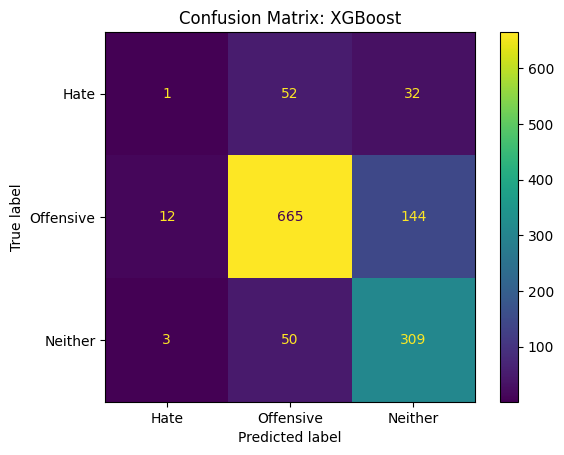

In [55]:
# Import necessary modules for XGboost
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics and Evaluation
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["Hate", "Offensive", "Neither"]))

# Confusion Matrix Visualization
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=["Hate", "Offensive", "Neither"])
disp_xgb.plot(cmap="viridis")
plt.title("Confusion Matrix: XGBoost")
plt.show()


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.89      0.76      0.82       821
           2       0.57      0.88      0.69       362

    accuracy                           0.75      1268
   macro avg       0.49      0.55      0.50      1268
weighted avg       0.74      0.75      0.73      1268


Confusion Matrix:
 [[  0  39  46]
 [  0 626 195]
 [  0  42 320]]

AUC-ROC is not applicable for multi-class classification.


C:\Users\nuell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nuell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nuell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

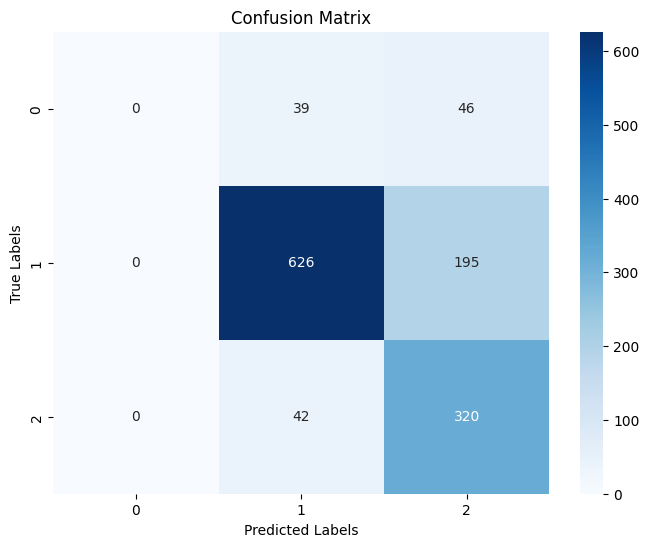

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train and predict with SVM
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)  # For AUC and ROC Curve

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.3f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", conf_matrix)

# AUC-ROC (Only if target is binary)
if len(set(y_test)) == 2:  # Check if binary classification
    auc = roc_auc_score(y_test, y_pred_prob_svm[:, 1])  # AUC requires probabilities
    print(f"\nAUC-ROC: {auc:.2f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nAUC-ROC is not applicable for multi-class classification.")

# Confusion Matrix Visualization
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [58]:
# voting model
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
], voting='soft')
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

# Model Evaluation

=== Random Forest ===

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.24      0.06      0.09        85
     Class 1       0.87      0.81      0.84       821
     Class 2       0.64      0.85      0.73       362

    accuracy                           0.77      1268
   macro avg       0.58      0.57      0.56      1268
weighted avg       0.76      0.77      0.76      1268


Confusion Matrix:
 [[  5  49  31]
 [ 11 669 141]
 [  5  49 308]]


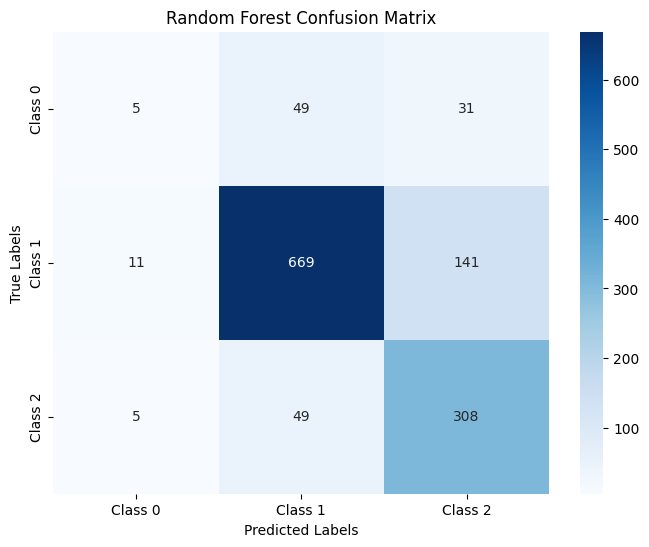


AUC-ROC is not applicable for multi-class classification.

=== Logistic Regression ===

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        85
     Class 1       0.89      0.74      0.80       821
     Class 2       0.52      0.83      0.64       362

    accuracy                           0.71      1268
   macro avg       0.47      0.52      0.48      1268
weighted avg       0.72      0.71      0.70      1268


Confusion Matrix:
 [[  0  18  67]
 [  0 604 217]
 [  1  59 302]]


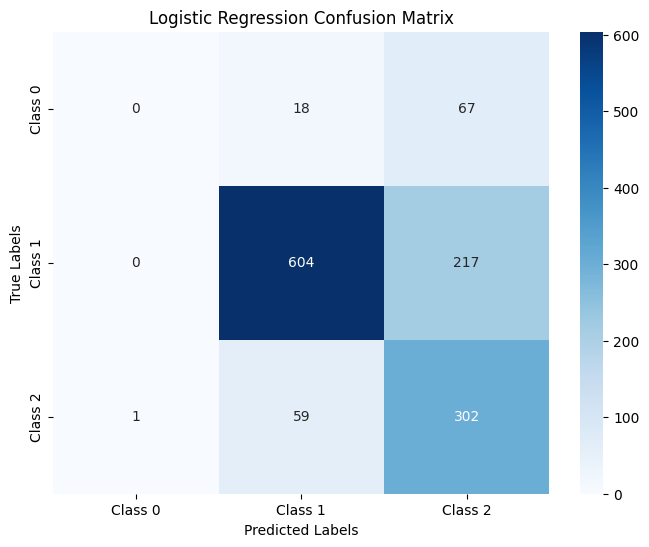


AUC-ROC is not applicable for multi-class classification.

=== XGBoost ===

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.06      0.01      0.02        85
     Class 1       0.87      0.81      0.84       821
     Class 2       0.64      0.85      0.73       362

    accuracy                           0.77      1268
   macro avg       0.52      0.56      0.53      1268
weighted avg       0.75      0.77      0.75      1268


Confusion Matrix:
 [[  1  52  32]
 [ 12 665 144]
 [  3  50 309]]


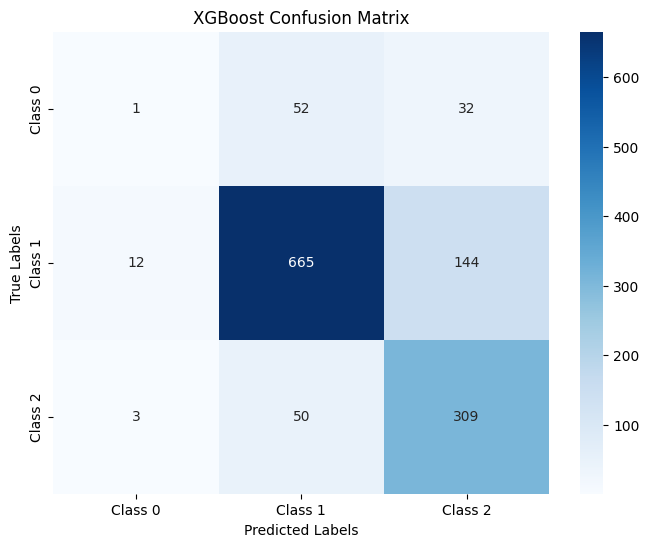


AUC-ROC is not applicable for multi-class classification.

=== SVM ===

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        85
     Class 1       0.89      0.76      0.82       821
     Class 2       0.57      0.88      0.69       362

    accuracy                           0.75      1268
   macro avg       0.49      0.55      0.50      1268
weighted avg       0.74      0.75      0.73      1268


Confusion Matrix:
 [[  0  39  46]
 [  0 626 195]
 [  0  42 320]]


C:\Users\nuell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nuell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nuell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

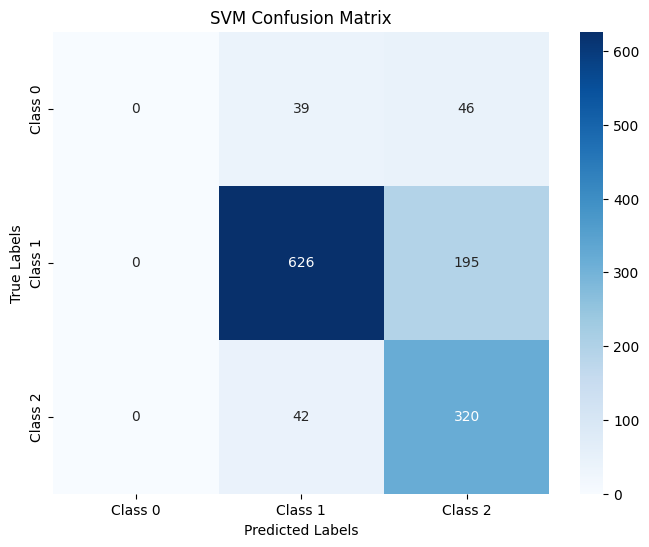


AUC-ROC is not applicable for multi-class classification.

=== Voting Classifier ===

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.12      0.01      0.02        85
     Class 1       0.87      0.81      0.84       821
     Class 2       0.63      0.86      0.73       362

    accuracy                           0.77      1268
   macro avg       0.54      0.56      0.53      1268
weighted avg       0.75      0.77      0.75      1268


Confusion Matrix:
 [[  1  52  32]
 [  6 667 148]
 [  1  49 312]]


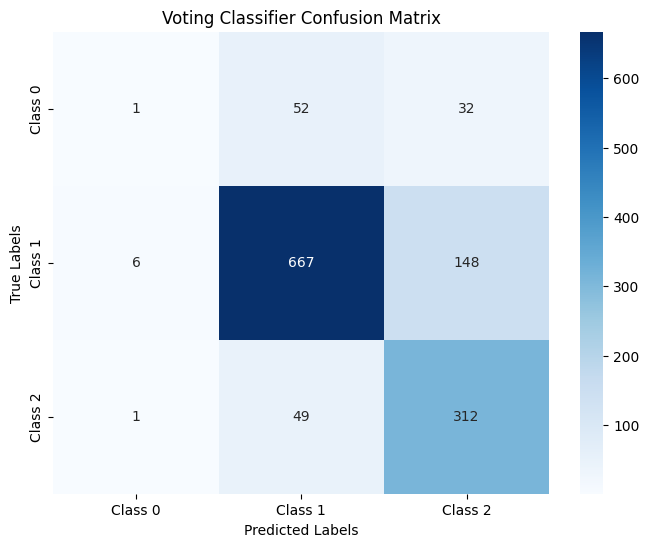


AUC-ROC is not applicable for multi-class classification.



In [60]:
# creating a function

def evaluate_model(y_test, y_pred, y_pred_prob, model_name, class_labels):
    """
    Evaluate and display metrics for a given model.
    Parameters:
        - y_test: True labels
        - y_pred: Predicted labels
        - y_pred_prob: Predicted probabilities
        - model_name: Name of the model (str)
        - class_labels: List of class labels
    """
    print(f"=== {model_name} ===\n")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}\n")

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_labels))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", conf_matrix)

    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # AUC-ROC (Only if target is binary)
    if len(class_labels) == 2:
        auc = roc_auc_score(y_test, y_pred_prob[:, 1])
        print(f"AUC-ROC: {auc:.2f}\n")
        
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} ROC Curve")
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("\nAUC-ROC is not applicable for multi-class classification.\n")

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Replace with your actual class names

# Random Forest
evaluate_model(y_test, y_pred_rf, rf_model.predict_proba(X_test), "Random Forest", class_labels)

# Logistic Regression
evaluate_model(y_test, y_pred_lr, lr_model.predict_proba(X_test), "Logistic Regression", class_labels)

# XGBoost
evaluate_model(y_test, y_pred_xgb, xgb_model.predict_proba(X_test), "XGBoost", class_labels)

evaluate_model(y_test, y_pred_svm, svm_model.predict_proba(X_test), "SVM", class_labels)


# voting
evaluate_model(
    y_test, 
    y_pred_voting, 
    voting_model.predict_proba(X_test), 
    "Voting Classifier", 
    class_labels
)

# Saving The Model

In [ ]:
#pip install pickle

In [70]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


# Save the component
with open('ml_pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

# Save the vectorizer
with open('tf_idf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [1]:
!pip freeze > requirements.txt